<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/Deliverytime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/Food_Delivery_Times.csv")

In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [7]:
df =df.dropna()

In [8]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [9]:
sns.set_style("whitegrid")

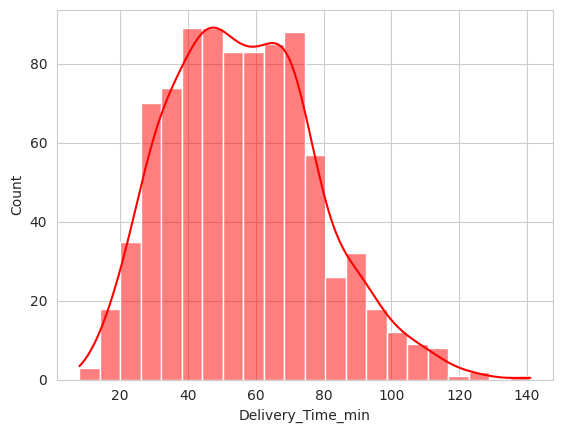

In [10]:
sns.histplot(data=df, x="Delivery_Time_min", kde=True, color="red")
plt.show()

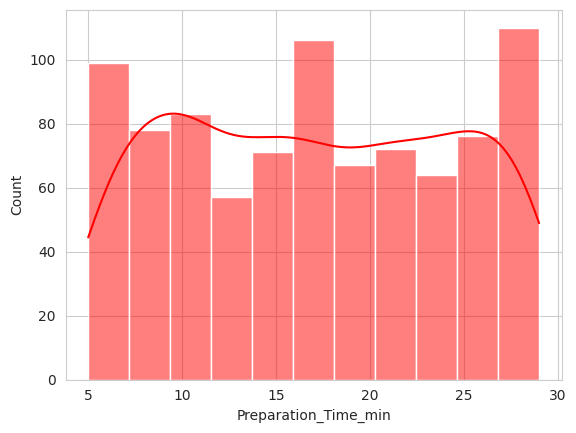

In [11]:
sns.histplot(data=df, x="Preparation_Time_min", kde=True, color="red")
plt.show()

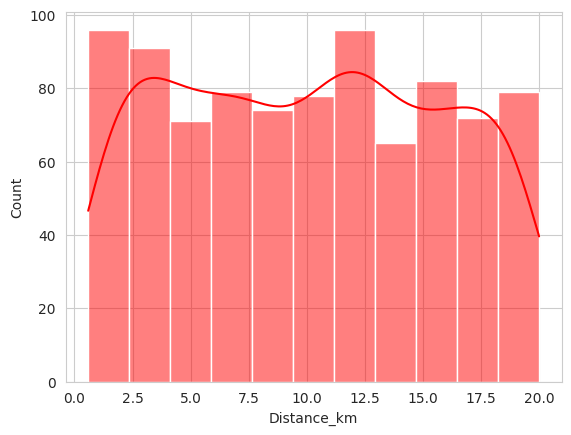

In [12]:
sns.histplot(data=df, x="Distance_km", kde=True, color="red")
plt.show()

In [13]:
df_averagetime= df.groupby("Time_of_Day")["Delivery_Time_min"].mean()

In [14]:
df_averagevechicle= df.groupby("Vehicle_Type")["Delivery_Time_min"].mean()

In [15]:
df_averageweather= df.groupby("Weather")["Delivery_Time_min"].mean()

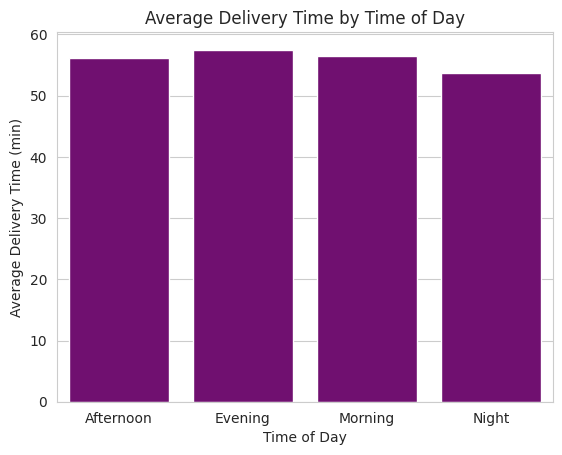

In [20]:
sns.barplot(x=df_averagetime.index, y=df_averagetime.values, color="purple")
plt.xlabel("Time of Day")
plt.ylabel("Average Delivery Time (min)")
plt.title("Average Delivery Time by Time of Day")
plt.show()

Text(0.5, 1.0, 'Average Delivery Time by Vehicle Type')

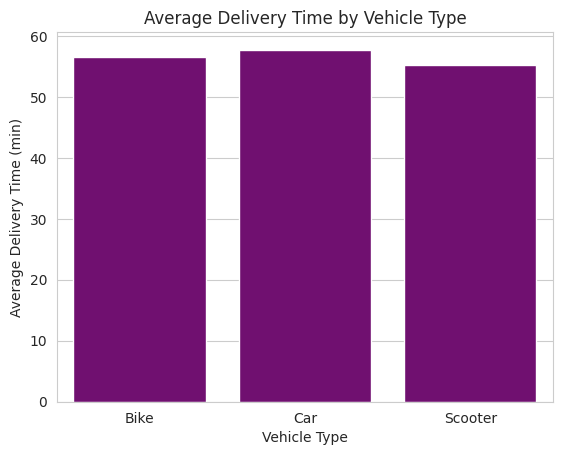

In [21]:
sns.barplot(x=df_averagevechicle.index, y=df_averagevechicle.values, color="purple")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (min)")
plt.title("Average Delivery Time by Vehicle Type")

/tmp/ipython-input-23-3163855233.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="Distance_km", y="Delivery_Time_min", palette="Set2")


Text(0.5, 1.0, 'Relationship between Distance and Delivery Time')

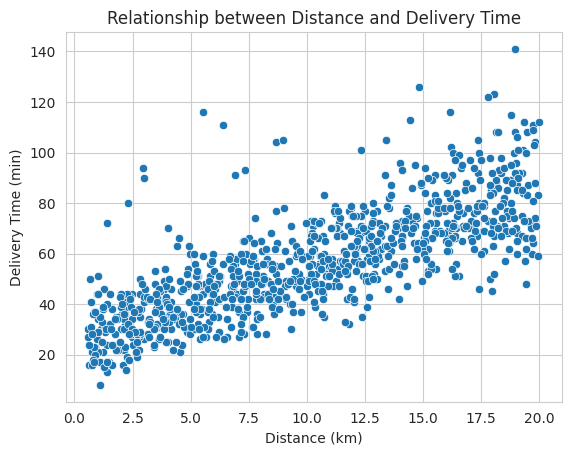

In [23]:
sns.scatterplot(data=df, x="Distance_km", y="Delivery_Time_min", palette="Set2")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.title("Relationship between Distance and Delivery Time")

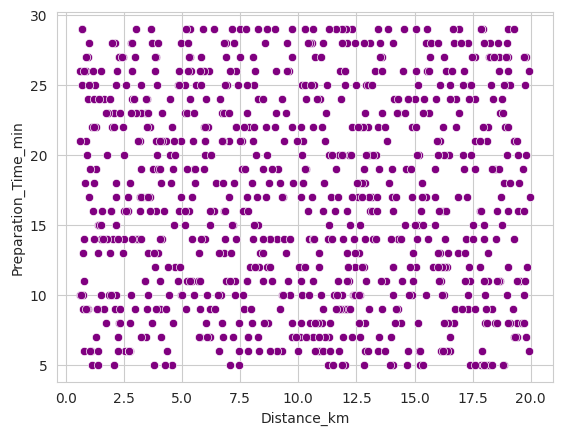

In [24]:
sns.scatterplot(data=df, x="Distance_km", y="Preparation_Time_min", color="purple")
plt.show()

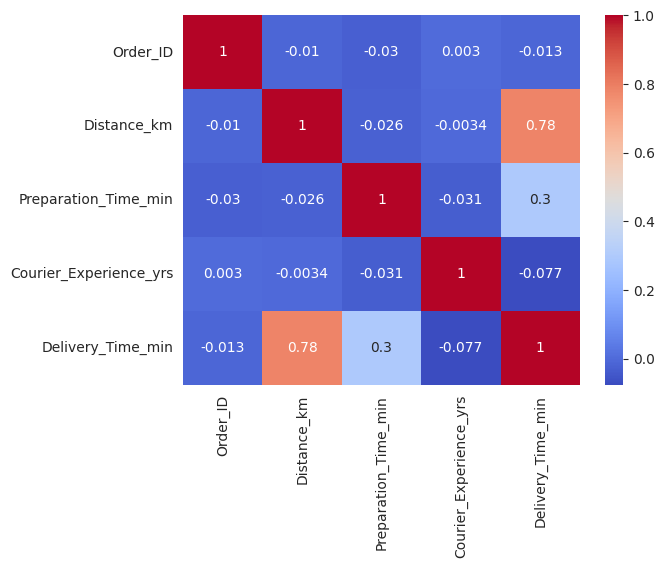

In [26]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [28]:
df= df.drop("Order_ID", axis=1)

In [30]:
category_cols= ["Weather",	"Traffic_Level",	"Time_of_Day",	"Vehicle_Type"]

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[category_cols]=LE.fit_transform(category_cols)


In [31]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,3,1,0,2,12,1.0,43
1,16.42,3,1,0,2,20,2.0,84
2,9.52,3,1,0,2,28,1.0,59
3,7.44,3,1,0,2,5,1.0,37
4,19.03,3,1,0,2,16,5.0,68


In [32]:
X=df.drop("Delivery_Time_min", axis= 1)
y=df["Delivery_Time_min"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
mse= mean_squared_error(y_test, y_pred_lr)
mse

94.25649655304065

In [39]:
lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso=lasso.predict(X_test)
mse_lasso= mean_squared_error(y_test, y_pred_lasso)

In [40]:
mse_lasso

93.8380143352789

In [42]:
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge=ridge.predict(X_test)
mse_ridge=mean_squared_error(y_test, y_pred_ridge)
mse_ridge

94.25583662863141

In [44]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt= dt.predict(X_test)
mse_dt= mean_squared_error(y_test, y_pred_dt)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dt)

0.03389830508474576

In [45]:
# prompt: i haev to do grid search for every model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor # Use Regressor for a regression task

# Correct the LabelEncoding part
df_encoded = df.copy()
for col in category_cols:
  df_encoded[col] = LE.fit_transform(df_encoded[col])

X_encoded = df_encoded.drop("Delivery_Time_min", axis=1)
y_encoded = df_encoded["Delivery_Time_min"]

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


# Linear Regression (no hyperparameters to tune with GridSearchCV)
# You would typically not use GridSearchCV for Linear Regression as there are no hyperparameters.
# The original fit and predict code for Linear Regression is sufficient.


# Lasso Regression
param_grid_lasso = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_encoded, y_train_encoded)

print("Best parameters for Lasso:", grid_search_lasso.best_params_)
print("Best negative MSE for Lasso:", grid_search_lasso.best_score_)

best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso_tuned = best_lasso_model.predict(X_test_encoded)
mse_lasso_tuned = mean_squared_error(y_test_encoded, y_pred_lasso_tuned)
print("MSE for tuned Lasso:", mse_lasso_tuned)

# Ridge Regression
param_grid_ridge = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_encoded, y_train_encoded)

print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best negative MSE for Ridge:", grid_search_ridge.best_score_)

best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge_tuned = best_ridge_model.predict(X_test_encoded)
mse_ridge_tuned = mean_squared_error(y_test_encoded, y_pred_ridge_tuned)
print("MSE for tuned Ridge:", mse_ridge_tuned)

# Decision Tree Regressor (since the target variable is continuous)
param_grid_dt = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_encoded, y_train_encoded)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best negative MSE for Decision Tree:", grid_search_dt.best_score_)

best_dt_model = grid_search_dt.best_estimator_
y_pred_dt_tuned = best_dt_model.predict(X_test_encoded)
mse_dt_tuned = mean_squared_error(y_test_encoded, y_pred_dt_tuned)
print("MSE for tuned Decision Tree:", mse_dt_tuned)

# For Linear Regression, the initial fit and predict is sufficient as there are no hyperparameters
lr = LinearRegression()
lr.fit(X_train_encoded, y_train_encoded)
y_pred_lr = lr.predict(X_test_encoded)
mse_lr = mean_squared_error(y_test_encoded, y_pred_lr)
print("MSE for Linear Regression:", mse_lr)


Best parameters for Lasso: {'alpha': 0.1}
Best negative MSE for Lasso: -143.13790560271858
MSE for tuned Lasso: 94.19718757714199
Best parameters for Ridge: {'alpha': 10.0}
Best negative MSE for Ridge: -143.1397409041993
MSE for tuned Ridge: 94.24997806114081
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Best negative MSE for Decision Tree: -186.59925816298903
MSE for tuned Decision Tree: 121.10826493627715
MSE for Linear Regression: 94.25649655304065


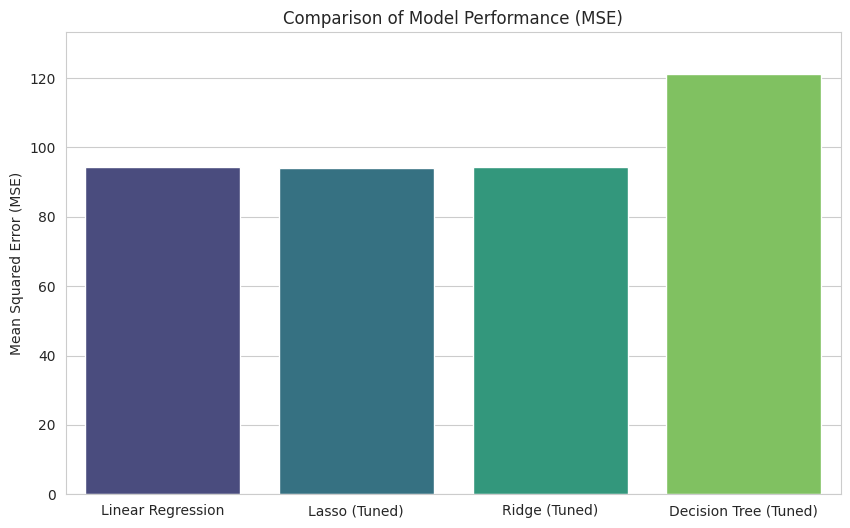

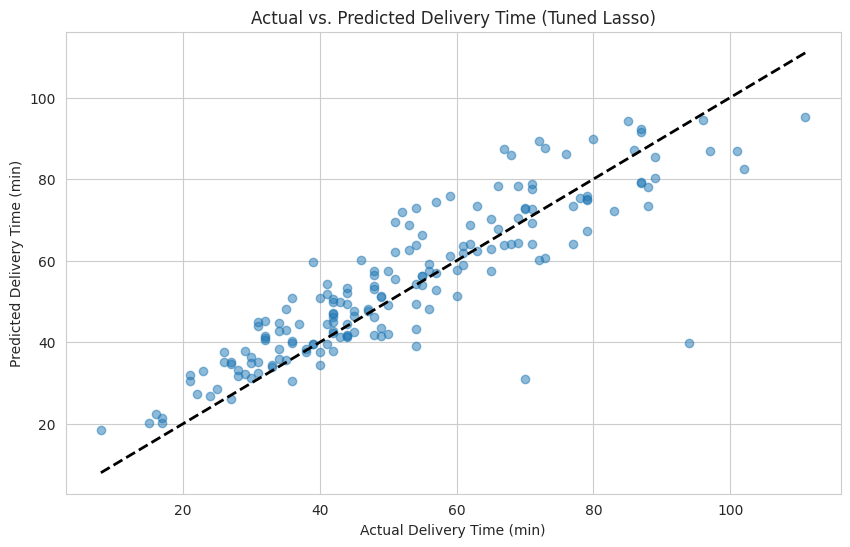

In [46]:
import matplotlib.pyplot as plt
# Compare the performance of the models
models = ['Linear Regression', 'Lasso (Tuned)', 'Ridge (Tuned)', 'Decision Tree (Tuned)']
mse_values = [mse_lr, mse_lasso_tuned, mse_ridge_tuned, mse_dt_tuned]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Model Performance (MSE)')
plt.ylim(0, max(mse_values) * 1.1) # Set y-axis limit for better visualization
plt.show()

# You can also visualize the predictions vs actuals for the best performing model
# Let's assume the best model is the one with the lowest MSE (based on the bar plot)
# For demonstration, let's visualize the predictions of the tuned Lasso model

plt.figure(figsize=(10, 6))
plt.scatter(y_test_encoded, y_pred_lasso_tuned, alpha=0.5)
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs. Predicted Delivery Time (Tuned Lasso)")
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
plt.show()

# You can do similar visualizations for other models as well.
# For example, for the tuned Decision Tree:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test_encoded, y_pred_dt_tuned, alpha=0.5, color='orange')
# plt.xlabel("Actual Delivery Time (min)")
# plt.ylabel("Predicted Delivery Time (min)")
# plt.title("Actual vs. Predicted Delivery Time (Tuned Decision Tree)")
# plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], 'k--', lw=2)
# plt.show()